# PetFinder.my Adoption Prediction

COMP-3125 Data Science  
Professor Ergezer   
Mengting Wang, Yen Le  
12/15/2020

## Table of Contents
- [Data Exploration](#Data-Exploration)
    - [Read Data](#Read-Data)
    - [Data Fields](#Data-Fields)
    - [Data Visualization ](#Data-Visualization)
- [Machine Learning Models](#Machine-Learning-Models)
    - [Feature Engineering](#Feature-Engineering)
- [Conclusion](#Conclusion)

## Data Exploration

In [14]:
# required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

### Read Data

In [3]:
# read data
train = pd.read_csv (r'C:\Users\wangm1\Desktop\DS Final Project\train\train.csv')
test = pd.read_csv (r'C:\Users\wangm1\Desktop\DS Final Project\test\test.csv')
breed = pd.read_csv (r'C:\Users\wangm1\Desktop\DS Final Project\breed_labels.csv')
color = pd.read_csv (r'C:\Users\wangm1\Desktop\DS Final Project\color_labels.csv')
state = pd.read_csv (r'C:\Users\wangm1\Desktop\DS Final Project\state_labels.csv')

# breed
# color
# state
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3,4


In [4]:
# get a summary of data
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


### Data Fields
Although the dataset is clean and easy to understand, however, some of the column headers are not intuitive.  
Here's what they mean:

1. PetID - Unique hash ID of pet profile
2. AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. 
3. Type - Type of animal (1 = Dog, 2 = Cat)
4. Name - Name of pet (Empty if not named)
5. Age - Age of pet when listed, in months
6. Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
7. Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
8. Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
9. Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
10. Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
11. Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
12. MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
13. FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
14. Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
15. Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
16. Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
17. Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
18. Quantity - Number of pets represented in profile
19. Fee - Adoption fee (0 = Free)
20. State - State location in Malaysia (Refer to StateLabels dictionary)
21. RescuerID - Unique hash ID of rescuer
22. VideoAmt - Total uploaded videos for this pet
23. PhotoAmt - Total uploaded photos for this pet
24. Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

#### Adoption Speed
The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:

0 - Pet was adopted on the same day as it was listed.  
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.  
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.  
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.  
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### Data Visualization


Text(0.5, 0, 'Count')

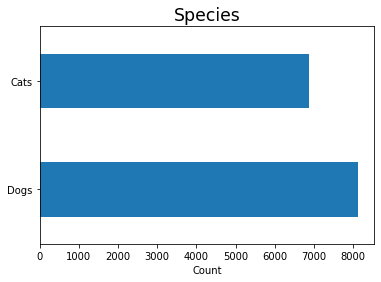

In [5]:
plt.title('Species', fontsize='xx-large')
train['Type'].value_counts().rename({1:'Dogs',2:'Cats'}).plot(kind='barh')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

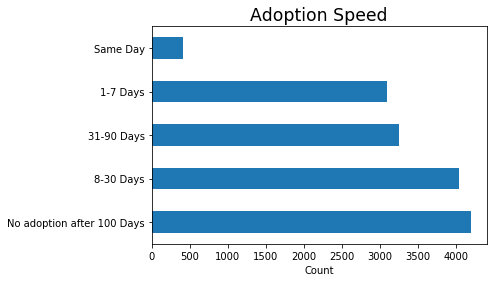

In [6]:
plt.title('Adoption Speed', fontsize='xx-large')
train['AdoptionSpeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh')
plt.xlabel('Count')

## Machine Learning Models

### Feature Engineering

There are some features are not as relevant for predicting the adoption speed, such as a pet's name, resourceID, petID and description. In addition, most of the values in Breed2 and Color3 are 0 ( unknown), which means they do not provide any significant information in the prediction of the adoption speed as well.   
Thus, we can remove these features.

In [7]:
drop = ['Name', 'Breed2','Color3', 'RescuerID', 'PetID', 'Description']
train = train.drop(drop, axis = 1)
# test  = test.drop(drop, axis = 1)

X = train.drop(['AdoptionSpeed'], axis = 1)
y = train.AdoptionSpeed

#Train-Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)

# confirm split
print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (11244, 17)
Training Labels Shape: (11244,)
Testing Features Shape: (3749, 17)
Testing Labels Shape: (3749,)


###  Approach one - KNeighborsClassifier 

In [8]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)

# Test it on test data
y_model = model.predict(Xtest)

# accuracy score
accuracy_score(ytest, y_model)

0.3307548679647906

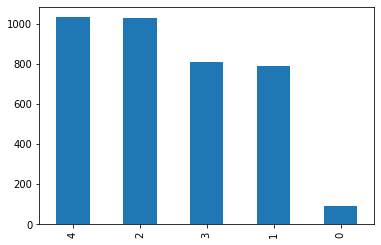

In [9]:
# Adoption speed distribution
ytest.value_counts().plot.bar()

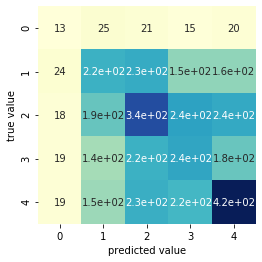

In [10]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

###  Approach two - Naive Bayes

In [11]:
model = GaussianNB()                       # instantiate model
model.fit(Xtrain, ytrain)                  # fit model to data
y_model = model.predict(Xtest)             # predict on new data/ apply model to the test data

#3. Test it on test data.
accuracy_score(ytest, y_model)

0.3376900506801814

In [12]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, y_model, weights = "quadratic")

0.22002287044473023

###  Approach Three - Random Forest Classifier

In [15]:
model = RandomForestClassifier(n_estimators=150)
model.fit(Xtrain,ytrain)

# Make predictions on test data
y_model = model.predict(Xtest)

# accuracy score
accuracy_score(ytest, y_model)

0.40010669511869834

###  Approach Four - Random Forest Regressor

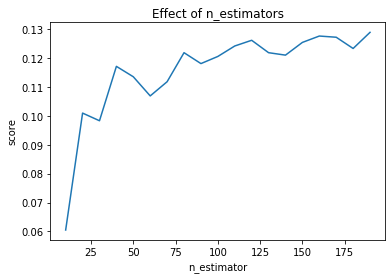

In [16]:
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(Xtrain, ytrain)
    scores.append(model.score(Xtest, ytest))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

According to the graph, we decided to chooe 150 as the estimator

In [17]:
model = RandomForestRegressor(n_estimators=150)
model.fit(Xtrain,ytrain)

# Make predictions on test data
y_model = model.predict(Xtest)

# accuracy score
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ytest, y_model))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ytest, y_model))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_model)))


NameError: name 'metrics' is not defined

###  Approach Five - Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter = 15000)
model.fit(Xtrain,ytrain)

# Make predictions on test data
y_model = model.predict(Xtest)

# accuracy score
accuracy_logistic = accuracy_score(ytest, y_model)
print(accuracy_logistic)


0.3110162710056015


In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, y_model, weights = "quadratic")

0.14233247877412913

## Conclusion